## 기술적 지표 구현

## 기술적 지표

 트레이딩을 위해서는 과거 주가의 움직임이나 패턴을 통해 향후 주식 가격의 등락을 판단하는 '기술적 분석'에 의존.  기술적 지표는 추세의 방향이나 강도, 혹은 가격의 움직임의 속도와 정도를 측정. 기술적 지표를 이용한 트레이딩 전략은 크게 '추세추종전략'과 '평균회귀전략'으로 나눌 수 있다. 

1. 추세추종 전략: 이동평균 등의 지표가 사용
2. 평균회귀 전략: RSI, 볼린저밴드 등의 지표가 사용


### pandas-ta 패키지

수식의 계산보다 패키지를 이용하면 매우 손쉽게 계산할 수 있다.  pandas-ta 패키지로 다양한 기술적 지표를 계산할 수 있다. 해당 패키지에 대한 자세한 내용은 공식 깃허브를 참조.

```
https://github.com/twopirllc/pandas-ta
```

### 이동평균

장단기 이동평균은 현재의 추세나 추세 역전, 혹은 저항 수준을 확인할 때 사용. 흔히 이동평균이 상승하는 상황에서 주가가 그보다 위에 있다면 상승 신호로 판단. 반대로 이동평균이 하락하는 상황에서 주가가 그보다 아래에 있다면 하락 신호로 여김.

골든크로스란 단기 이동평균선이 중장기 이동평균선을 아래에서 위로 뚫고 올라가는 현상으로써 강세신호를 나타내며, 데드크로스는 단기 이동평균선이 중장기 이동평균선을 위에서 아래로 뚫고 내려가는 현상으로 약세신호를 나타냄.


이동평균을 계산하는 방법은 가격 데이터에 가중치를 얼마나 두냐에 따라 여러가지 방법이 존재하지만, 크게 단순 이동평균과 지수 이동평균이 사용된다.

- 단순 이동평균(SMA, Simple Moving Average): 단순히 주어진 기간 동안의 종가의 평균

- 지수 이동평균(EMA, Exponential Moving Average): 최근 데이터가 더욱 중요할 수 있으며, 
    지수 이동평균은 이를 반영하여 각 데이터에 가중치를 다르게 부여한 후 평균을 구한다.

In [1]:
import pandas as pd
import numpy as np
from pykrx import stock

tickers=stock.get_market_ticker_list(market="KOSPI")


In [2]:
df =stock.get_market_ohlcv("20230101","20240905","005930","d",adjusted=False)  # 주기 m,y,d
df.head()


,시가,고가,저가,종가,거래량,거래대금,등락률
날짜,,,,,,,
2023-01-02,55500,56100,55200,55500,10031448,558433491400,0.36
2023-01-03,55400,56000,54500,55400,13547030,747898872200,-0.18
2023-01-04,55700,58000,55600,57800,20188071,1151473733800,4.33
2023-01-05,58200,58800,57600,58200,15682826,911973904900,0.69
2023-01-06,58300,59400,57900,59000,17334989,1018769177900,1.37


In [3]:
import yfinance as yf
stock_data=yf.download('^GSPC')  # S&P500

stock_data=stock_data.tail(500)

[*********************100%***********************]  1 of 1 completed


In [4]:
# ! pip install pandas_ta 

C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\4276456114.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20']=ta.sma(stock_data['Close'],length=20)  # 20일 단순이동평균
C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\4276456114.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_60']=ta.sma(stock_data['Close'],length=60)  # 60일 단순이동평균


<Axes: xlabel='Date'>

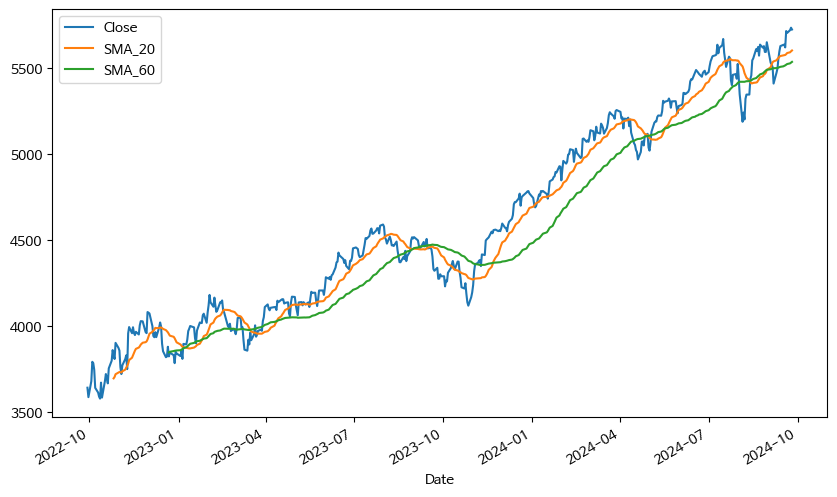

In [5]:
# 이동평균 


import pandas_ta as ta
import matplotlib.pyplot as plt

stock_data['SMA_20']=ta.sma(stock_data['Close'],length=20)  # 20일 단순이동평균
stock_data['SMA_60']=ta.sma(stock_data['Close'],length=60)  # 60일 단순이동평균

stock_data[['Close','SMA_20','SMA_60']].plot(figsize=(10,6))

C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\2246319523.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['EMA_20']=ta.ema(stock_data['Close'],20)  # 60일 지수이동평균


<Axes: xlabel='Date'>

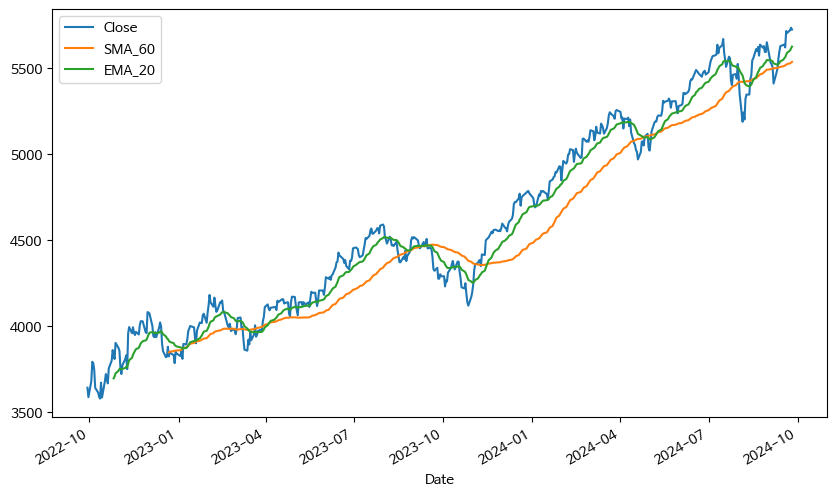

In [6]:
# 지수이동평균

'''
지수 이동평균이 최근 데이터에 더 많은 가중치를 부여하기에, 
단순 이동평균보다 주가의 움직임에 따라 더욱 민감하게 반응
'''

stock_data['EMA_20']=ta.ema(stock_data['Close'],20)  # 60일 지수이동평균
stock_data[['Close','SMA_60','EMA_20']].plot(figsize=(10,6))



### 상대강도지수(RSI)

RSI는 일정기간 동안 주가의 상승폭과 하락폭의 크기를 비교해 
상승과 하락의 상대적인 강도를 나타낸 지표.

1. U(Up): 가격이 상승한 날의 상승폭
2. D(Down): 가격이 하락한 날의 하락폭
3. AU(Average Up)과 AD(Average Down): U값과 D값의 평균을 각각 구함
4. RS(Relative Strenth): AU/AD를 통해 상대강도를 구함

RS 값이 크다는 것은 일정기간 동안 상승한 폭이 하락한 폭보다 크다는 것을 의미하며, 
RSI는 0에서 100 범위 내에서 움직인다.
일반적으로 RSI가 70 이상일 경우 과매수 구간으로써 매도할 때로,
30 이하일 경우 과매도 구간으로써 매수해야 할 때로 판단.
다시말해 지나친 상승 뒤에는 하락할 것을, 지나친 하락 뒤에는 상승할 것을 기대.









C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\1924360369.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'] = ta.rsi(stock_data['Close'], length=14)
C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\1924360369.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['RSI_14'] = stock_data['RSI_14'].fillna(0)
C:\Users\wonee\AppData\Local\Temp\ipykernel_11540\1924360369.py:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be rem

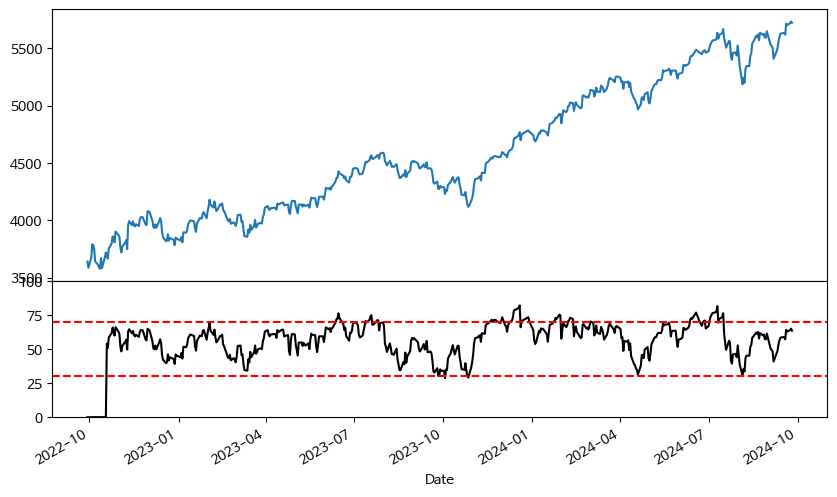

In [7]:
from matplotlib import gridspec

stock_data['RSI_14'] = ta.rsi(stock_data['Close'], length=14)
stock_data['RSI_14'] = stock_data['RSI_14'].fillna(0)

fig = plt.subplots(figsize=(10, 6), sharex=True)
gs = gridspec.GridSpec(nrows=2, ncols=1, height_ratios=[2, 1]) # 그림을 2개로 나눈다.

# 주가 그래프
ax1 = plt.subplot(gs[0])
ax1 = stock_data['Close'].plot()
ax1.set_xlabel('')
ax1.axes.xaxis.set_ticks([])

# RSI 표현하기
ax2 = plt.subplot(gs[1])
ax2 = stock_data['RSI_14'].plot(color='black', ylim=[0, 100])
ax2.axhline(y=70, color='r', linestyle='--')
ax2.axhline(y=30, color='r', linestyle='--')
ax2.set_xlabel
plt.subplots_adjust(wspace=0, hspace=0)

plt.show()

## 볼린저밴드

볼린저밴드는 이동평균선을 중심으로 일정 표준편차를 상한선과 하한선으로 설정한 밴드다. 

- 중심 밴드: n 기간 동안의 이동평균
- 상단 밴드: 중심 밴드 기준 k 표준편차 위
- 하단 밴드: 중심 밴드 기준 k 표준편차 아래

주가의 움직임이 정규분포를 따른다는 가정에 기초. 
정규분포에서는 데이터가 1 표준편차 내에 있을 확률이 약 68%, 
2 표준편차 내에 있을 확률이 약 95%, 3 표준편차 내에 있을 확률이 약 99%다.
주가가 정규분포를 따른다면, 주가의 움직임은 상한선과 하한선으로 구성된 
밴드 내에서만 움직일 확률이 높다. 따라서 주가가 상한선 위에 있다는 것은 
과매수 상태이므로 하락할 가능성이, 하단선 아래에 있다는 것은 과매도 상태이므로
상승할 가능성이 높다고 본다.


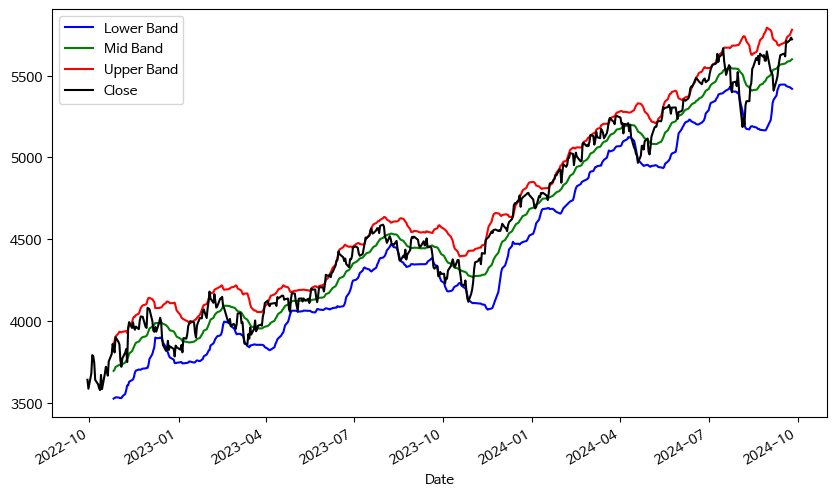

In [8]:
import pandas as pd

band = ta.bbands(stock_data["Close"], length=20, std=2)
bb = pd.concat([band[['BBL_20_2.0', 'BBM_20_2.0', 'BBU_20_2.0']], stock_data['Close']], axis = 1)
bb.columns = ['Lower Band', 'Mid Band', 'Upper Band', 'Close']
bb.plot(figsize=(10, 6),
        color={
            'Upper Band': 'red',
            'Lower Band': 'blue',
            'Mid Band': 'green',
            'Close': 'black'
        })
plt.show()